In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time

In [9]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
#Measure trainig time
start_time = time.time()

In [12]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 51s 67ms/step - loss: 0.5759 - accuracy: 0.7915 - val_loss: 0.3786 - val_accuracy: 0.8644
Epoch 2/15
750/750 [==============================] - 49s 66ms/step - loss: 0.3542 - accuracy: 0.8722 - val_loss: 0.3356 - val_accuracy: 0.8762
Epoch 3/15
750/750 [==============================] - 47s 62ms/step - loss: 0.3056 - accuracy: 0.8894 - val_loss: 0.2960 - val_accuracy: 0.8942
Epoch 4/15
750/750 [==============================] - 45s 60ms/step - loss: 0.2737 - accuracy: 0.9002 - val_loss: 0.2866 - val_accuracy: 0.8994
Epoch 5/15
750/750 [==============================] - 48s 64ms/step - loss: 0.2497 - accuracy: 0.9084 - val_loss: 0.2647 - val_accuracy: 0.9068
Epoch 6/15
750/750 [==============================] - 47s 63ms/step - loss: 0.2296 - accuracy: 0.9166 - val_loss: 0.2755 - val_accuracy: 0.9003
Epoch 7/15
750/750 [==============================] - 48s 64ms/step - loss: 0.2135 - accuracy: 0.9224 - val_loss: 0.2500 - val_accuracy:

In [15]:
end_time = time.time()
training_time = end_time-start_time
print("Training Time:",training_time,"second")

Training Time: 765.7932426929474 second


In [16]:
#Measure testing time
start_time = time.time()

In [17]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

In [18]:
# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 156ms/step


In [19]:
# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

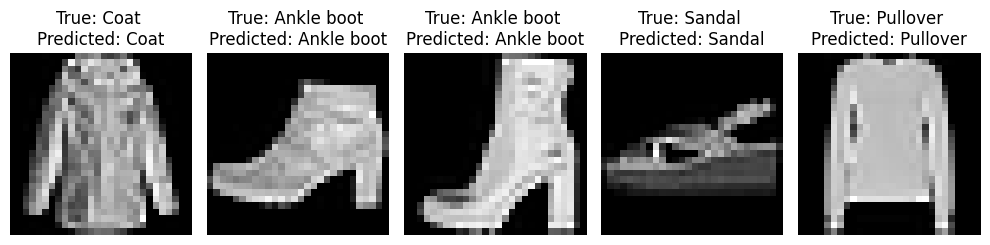

In [20]:
# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
end_time = time.time()
test_time = end_time-start_time
print("Testing Time:",test_time,"second")

Testing Time: 163.4023621082306 second


In [24]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

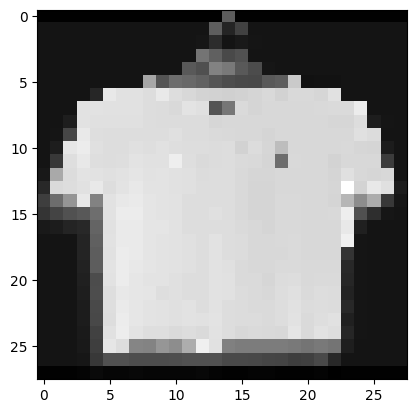

In [29]:
def preprocess_image(image_path):
  """
  Preprocesses a fashion image with black background and white foreground.

  Args:
      image_path: Path to the image file.

  Returns:
      A NumPy array representing the preprocessed image.
  """
  # Load the image from the file path in grayscale mode
  img = load_img(image_path, grayscale=True, target_size=(28, 28))

  # Convert the image to a NumPy array
  img_array = img_to_array(img)

  # Invert the grayscale values (black -> white, white -> black)
  img_array = 255 - img_array
  plt.imshow(img_array, cmap='gray')
  # Reshape the image array to add a dimension for the color channel (even though it's grayscale)
  img_array = img_array.reshape((1, 28, 28, 1))

  # Normalize the pixel values to be between 0 and 1
  return img_array / 255.0

# Example usage
preprocessed_image = preprocess_image("/content/shopping.jpeg")

In [30]:
x2 = model.predict(preprocessed_image)
print(x2)
print(class_labels[np.argmax(x2)])

1/1 [==============================] - 0s 23ms/step
[[1.9212019e-01 9.5436891e-04 6.4422544e-03 7.3718410e-03 1.1106241e-03
  4.3849373e-05 6.3415855e-02 3.9289049e-03 7.2437155e-01 2.4057018e-04]]
Bag


1/1 [==============================] - 0s 181ms/step
[[3.7664489e-07 7.8947065e-05 1.4506697e-09 2.4555800e-07 1.6856173e-05
  3.8237899e-10 8.6775632e-05 5.2583232e-08 9.9981648e-01 2.5607002e-07]]
Bag


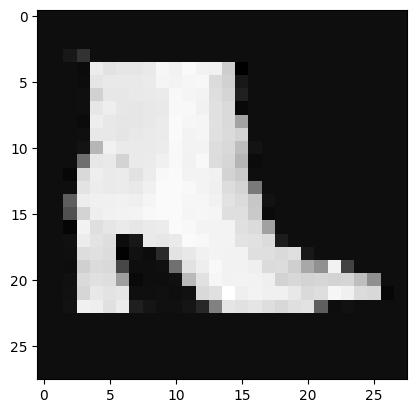

In [33]:
preprocessed_image = preprocess_image("/content/ankleboot.jpeg")
x2 = model.predict(preprocessed_image)
print(x2)
print(class_labels[np.argmax(x2)])

1/1 [==============================] - 0s 51ms/step
[[1.1404105e-06 3.1758653e-08 5.3156661e-03 8.1479783e-09 9.9466395e-01
  5.0982639e-08 1.8525674e-05 1.1109612e-09 4.3052452e-07 1.9763762e-07]]
Coat


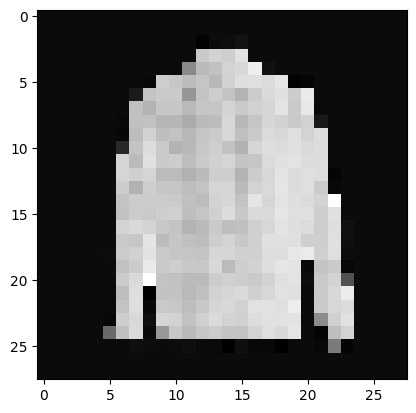

In [34]:
preprocessed_image = preprocess_image("/content/shirt.jpeg")
x2 = model.predict(preprocessed_image)
print(x2)
print(class_labels[np.argmax(x2)])

1/1 [==============================] - 0s 26ms/step
[[6.4477632e-03 5.4510742e-01 2.2587423e-01 6.4001428e-03 1.9322127e-02
  1.1349155e-06 6.5233126e-02 3.2372688e-10 1.3161406e-01 4.6821378e-09]]
Trouser


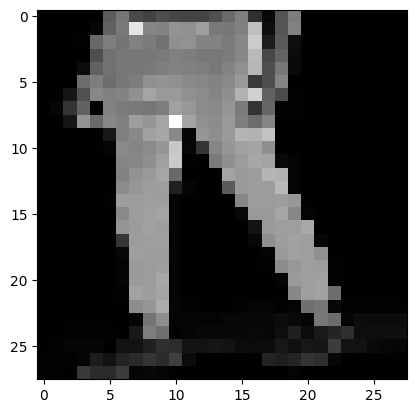

In [36]:
preprocessed_image = preprocess_image("/content/trouser.jpeg")
x2 = model.predict(preprocessed_image)
print(x2)
print(class_labels[np.argmax(x2)])

1/1 [==============================] - 0s 26ms/step
[[8.9209463e-04 1.7364420e-05 6.4983018e-02 6.1618368e-05 4.3528975e-04
  1.3975769e-05 2.5087362e-03 6.9763191e-05 9.3049401e-01 5.2411936e-04]]
Bag


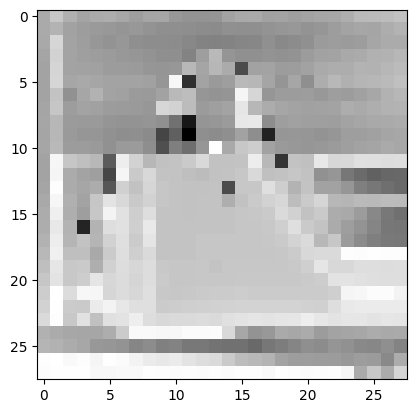

In [37]:
preprocessed_image = preprocess_image("/content/handbag.jpeg")
x2 = model.predict(preprocessed_image)
print(x2)
print(class_labels[np.argmax(x2)])

1/1 [==============================] - 0s 68ms/step
[[4.1381596e-09 2.6305402e-16 2.3812344e-14 7.9156616e-16 1.4595910e-12
  1.0000000e+00 3.1425522e-14 1.4971890e-11 3.3837559e-08 4.8409491e-14]]
Sandal


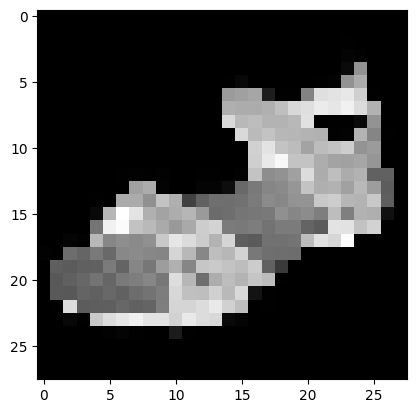

In [38]:
preprocessed_image = preprocess_image("/content/sandal.jpeg")
x2 = model.predict(preprocessed_image)
print(x2)
print(class_labels[np.argmax(x2)])